In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay
import shap

In [2]:
train = pd.read_csv("./data/feature_selected/train_gearbox_classif.csv", sep=",")
test = pd.read_csv("./data/feature_selected/test_gearbox_classif.csv", sep=",")

In [3]:
reg_target_name = "RUL (Target)"
class_target_name = "Failure (Target)"
drop_cols = [reg_target_name, class_target_name, "Turbine_ID", "Timestamp", "Unnamed: 0", "index_y"]

X_train = train.drop(columns=drop_cols)
y_train = train[class_target_name]
X_test = test.drop(columns=drop_cols)
y_test = test[class_target_name]

In [4]:
X_train.head()

,Gen_RPM_Std,Amb_WindDir_Relative_Avg,Amb_Temp_Avg,HVTrafo_Phase2_Temp_Avg,Blds_PitchAngle_Max,Grd_Prod_Freq_Avg,Grd_Prod_VoltPhse2_Avg,Grd_Prod_ReactPwr_Min,Grd_Prod_PsbleInd_Std,Nac_Direction_Avg,Min_Windspeed1,Max_Pressure,Avg_Humidity,Min_Precipitation,Max_Raindetection
0,448.1,2.6,24,48,44.7,50.0,398.0,-24.5,49.1,160.0,1.8,1007.0,72.0,0.0,0.0
1,99.2,-3.2,30,62,-0.9,50.0,397.2,-132.5,0.0,308.0,3.8,1008.0,39.0,0.0,0.0
2,25.3,-0.5,22,70,0.8,50.0,398.3,-96.1,266.6,260.6,1.7,1011.0,55.0,0.0,0.0
3,92.7,12.0,27,83,-0.6,50.0,396.3,-104.1,118.0,291.4,3.4,1008.0,61.0,0.0,0.0
4,10.4,23.5,15,72,5.3,50.0,395.3,-104.2,229.2,245.5,3.4,1008.0,80.0,0.0,0.0


In [5]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [6]:
base_estimator = DecisionTreeClassifier(random_state=0)
param_grid = {
    "max_depth": [5, 10, 20],#scipy.stats.randint(5, 60),
    "min_samples_leaf": [1, 10, 50, 100],#scipy.stats.randint(1, 100),
}
sh = GridSearchCV(base_estimator, param_grid, scoring="f1").fit(X_train, y_train)
clf = sh.best_estimator_
report(sh.cv_results_)

Model with rank: 1
Mean validation score: 0.344 (std: 0.026)
Parameters: {'max_depth': 20, 'min_samples_leaf': 1}

Model with rank: 2
Mean validation score: 0.317 (std: 0.021)
Parameters: {'max_depth': 20, 'min_samples_leaf': 10}

Model with rank: 3
Mean validation score: 0.212 (std: 0.045)
Parameters: {'max_depth': 10, 'min_samples_leaf': 1}



In [7]:
X_test.columns

Index(['Gen_RPM_Std', 'Amb_WindDir_Relative_Avg', 'Amb_Temp_Avg',
       'HVTrafo_Phase2_Temp_Avg', 'Blds_PitchAngle_Max', 'Grd_Prod_Freq_Avg',
       'Grd_Prod_VoltPhse2_Avg', 'Grd_Prod_ReactPwr_Min',
       'Grd_Prod_PsbleInd_Std', 'Nac_Direction_Avg', 'Min_Windspeed1',
       'Max_Pressure', 'Avg_Humidity', 'Min_Precipitation',
       'Max_Raindetection'],
      dtype='object')

In [8]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

In [9]:
shap_values[0][0]

array([ 8.78550655e-05,  7.77185118e-04,  2.36889240e-02, -2.83719987e-03,
        4.20213368e-04,  1.16972333e-05,  8.20751805e-04, -6.71203005e-04,
       -3.59387615e-03,  1.03618058e-02, -2.90509548e-03, -1.30097577e-03,
        1.62757012e-03,  0.00000000e+00,  0.00000000e+00])

In [10]:
explainer.expected_value

array([0.97351235, 0.02648765])

In [11]:
shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values[0][0], feature_names=X_test.columns.to_list())

In [18]:
shap_html = f"<head>{shap.getjs()}</head><body>{force_plot.html()}</body>"

In [20]:
import os
import webbrowser

path = os.path.abspath('sample.html')
url = 'file://' + path

with open(path, 'w', encoding="utf-8") as f:
    f.write(shap_html)
webbrowser.open(url)

True

In [87]:
shap_values[0][0]

array([ 8.78550655e-05,  7.77185118e-04,  2.36889240e-02, -2.83719987e-03,
        4.20213368e-04,  1.16972333e-05,  8.20751805e-04, -6.71203005e-04,
       -3.59387615e-03,  1.03618058e-02, -2.90509548e-03, -1.30097577e-03,
        1.62757012e-03,  0.00000000e+00,  0.00000000e+00])

<BarContainer object of 15 artists>

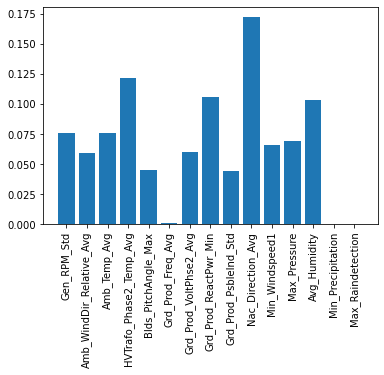

In [8]:
plt.xticks(rotation=90)
plt.bar(X_test.columns, clf.feature_importances_)

In [9]:
vars_of_interest = ["Nac_Direction_Avg"] #, "HVTrafo_Phase2_Temp_Avg", "Grd_Prod_ReactPwr_Min", "Avg_Humidity"]

In [50]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["font.size"] = 22
plt.rcParams["axes.ymargin"] = 1
plt.rcParams["axes.xmargin"] = 0.05
my_samples = X_train.sample(1000)
@interact_manual
def do_it(column=X_test.columns):
    PartialDependenceDisplay.from_estimator(clf, my_samples, [column], kind="both")

interactive(children=(Dropdown(description='column', options=('Gen_RPM_Std', 'Amb_WindDir_Relative_Avg', 'Amb_…

In [48]:
from ceteris_paribus.explainer import explain
from ceteris_paribus.profiles import individual_variable_profile
from ceteris_paribus.plots.plots import plot

In [49]:
explainer_tree = explain(clf, data=X_test, y=y_test, label='Tree',
    predict_function=lambda X: clf.predict_proba(X)[::, 1])
y_instance = y_test[y_test == 1.0].head(10)
X_instance = X_test.iloc[y_instance.index[0:10]]
y_instance = y_instance.to_list()
cp_tree = individual_variable_profile(explainer_tree, X_instance, y_instance)
plot(cp_tree, selected_variables=["HVTrafo_Phase2_Temp_Avg"])


In [57]:
from PyALE import ale
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (20, 10)

PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


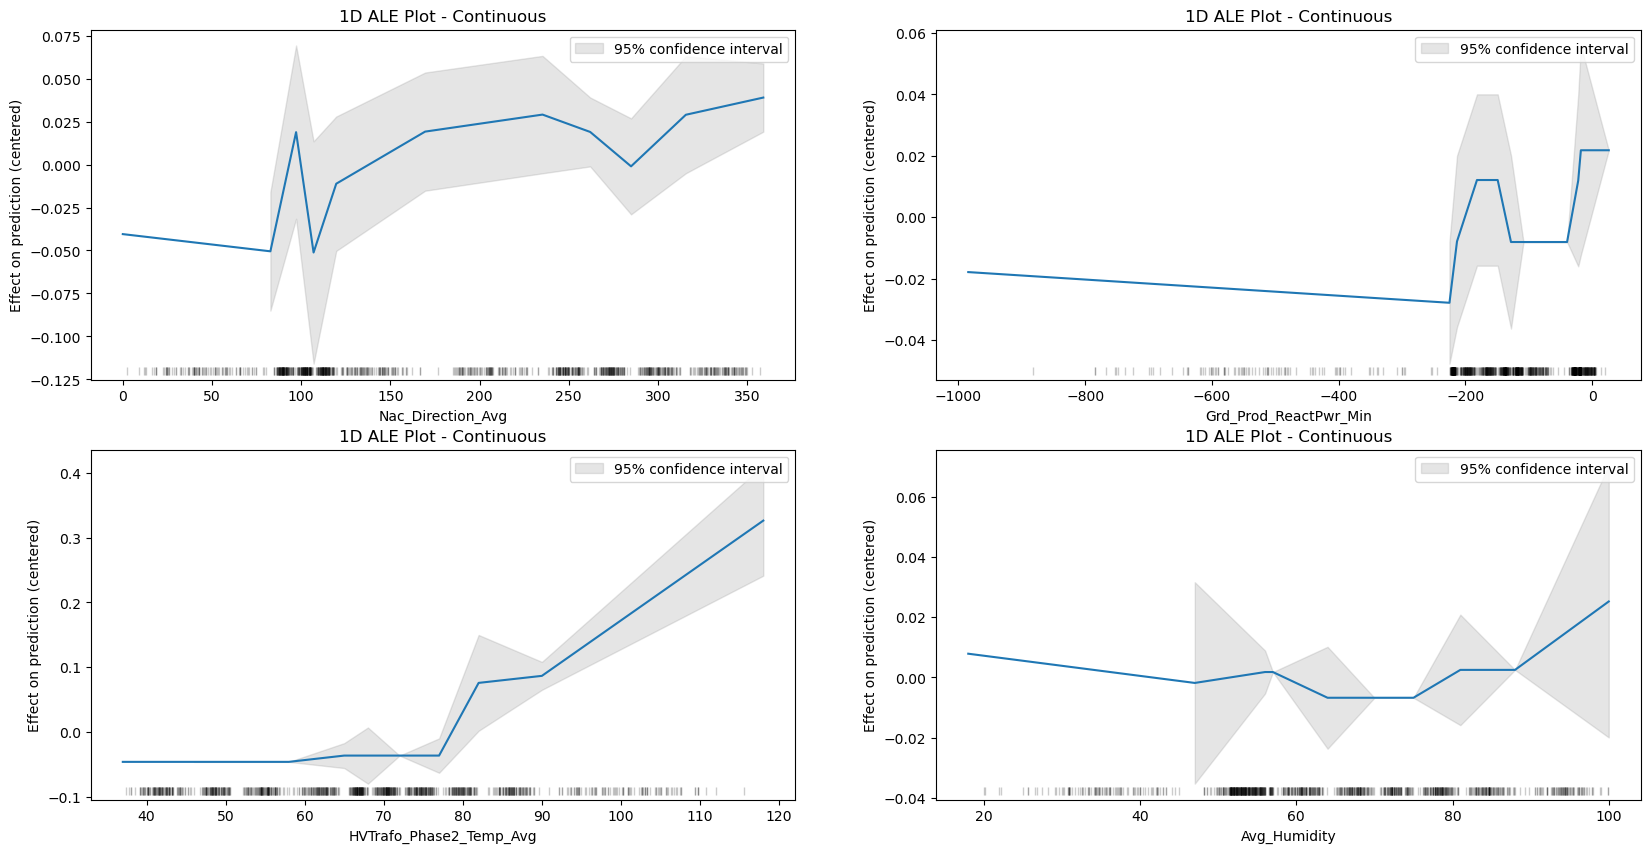

In [60]:
figure, axs = plt.subplots(2, 2)
# ax.set_yticklabels([0, 10, 20])
ale_eff = ale(
    X=X_train.sample(1000), model=clf, feature=[vars_of_interest[0]], grid_size=10, include_CI=True, C=0.95,
    ax=axs[0,0], fig=figure
)
ale_eff1 = ale(
    X=X_train.sample(1000), model=clf, feature=[vars_of_interest[1]], grid_size=10, include_CI=True, C=0.95,
    ax=axs[1,0], fig=figure
)
ale_eff2 = ale(
    X=X_train.sample(1000), model=clf, feature=[vars_of_interest[2]], grid_size=10, include_CI=True, C=0.95,
    ax=axs[0,1], fig=figure
)
ale_eff3 = ale(
    X=X_train.sample(1000), model=clf, feature=[vars_of_interest[3]], grid_size=10, include_CI=True, C=0.95,
    ax=axs[1,1], fig=figure
)

In [51]:
@interact_manual
def understand_decisions(column=X_test.columns, datapoints=100):
    sample = X_test.sample()
    min = int(X_test[column].min())
    max = int(X_test[column].max())
    scaler = (max - min) / datapoints
    predictions = []
    for i in range(datapoints):
        sample[column] = i * scaler + min
        predictions.append(clf.predict(sample))
    plt.ylim([-0.1, 1.1])
    plt.scatter(np.arange(min, max, scaler), predictions)
    

interactive(children=(Dropdown(description='column', options=('Gen_RPM_Std', 'Amb_WindDir_Relative_Avg', 'Amb_…

In [18]:
def plot_decision_tree(model, feature_names, class_names):
    tree = plot_tree(model, feature_names = feature_names, class_names = class_names,
                     rounded = True, proportion = True, precision = 2, filled = True, fontsize=10)
    
    return tree

In [19]:
def plot_decision_path_tree(model, X, class_names=[]):
    fig = plt.figure(figsize=(10, 30))
    feature_names = X.index if type(X) == type(pd.Series()) else X.columns
    
    # Getting the tree from the function programmed above
    print(model)
    print(feature_names)
    print(class_names)
    tree = plot_decision_tree(model, feature_names, None)
    
    # Get the decision path of the wanted prediction 
    decision_path = model.decision_path(X)

    # Now remember the tree object contains all nodes and leaves so the logic here
    # is to loop into the tree and change visible attribute for components that 
    # are not in the decision path
    for i in range(0,len(tree)):
        if i not in decision_path.indices:
            plt.setp(tree[i],visible=False)

    plt.show()

In [22]:
sample = X_test.sample()
@interact_manual
def plot_tree_paths(column=X_test.columns, datapoint=(1, 100, 1)):
    print(sample.drop(column, axis=1).head())
    min = int(X_test[column].min())
    max = int(X_test[column].max())
    new_value = min + (datapoint / 100) * (max - min)
    print("feature: {}, with value: {}".format(column, new_value))
    sample[column] = new_value
    plot_decision_path_tree(clf, sample, class_names=[class_target_name])

interactive(children=(Dropdown(description='column', options=('Gen_RPM_Std', 'Amb_WindDir_Relative_Avg', 'Amb_…